In [1]:
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
import pandas as pd
import OMPython
import os
init_notebook_mode(connected=True)

In [2]:
# OpenModelicaファイルのPATHの指定
model_name = "CoolingBottle.mo"
model_path = os.path.join(os.getcwd(), model_name).replace(os.path.sep, '/')

# OpenModelicaモデル読み込み
model = OMPython.ModelicaSystem(
    model_path,
    os.path.splitext(model_name)[0],
    ["Modelica"]
)

output_labels = [
    "time",
    "T_milk",
    "T_bottle",
]

Notification: Automatically loaded package Modelica 4.0.0 due to uses annotation.
Notification: Automatically loaded package Complex 4.0.0 due to uses annotation.
Notification: Automatically loaded package ModelicaServices 4.0.0 due to uses annotation.



In [3]:
# 初期値
t0_milk = 273.15 + 90 # [K]
t0_bottle = 273.15 + 90 # [K]
t_water = 273.15 + 15 # [K]

# モデルパラメータ
h_interface = 67.4 # [W/m2・K * m2]
g_bottle = 12.4 # [W/K]
hc_milk = 336 # [J/K]
hc_bottle = 75.4 # [J/K]


# モデルパラメータ変更
model.setParameters([
    f"T0Milk={t0_milk}",
    f"T0Bottle={t0_bottle}",
    f"TWater={t_water}",
    f"HInterface={h_interface}",
    f"GBottle={g_bottle}",
    f"HCMilk={hc_milk}",
    f"HCBottle={hc_bottle}",
])

# 計算時間の設定
time_start = 0.0 # [s]
time_stop = 10.0 * 60 # [s]

# 計算時の時間刻み
dt = 1.0 # [s]
step_size = dt
model.setSimulationOptions([
    f"startTime={time_start}",
    f"stopTime={time_stop}",
    f"stepSize={step_size}"
])


In [4]:
# Simlation実行
model.simulate()

<AxesSubplot:xlabel='time'>

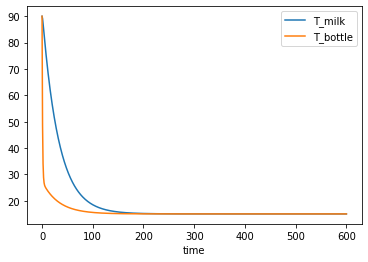

In [5]:
# 結果取得
res_array = model.getSolutions(output_labels)

df_res = pd.DataFrame(res_array.T, columns=output_labels)

# indexをtimeに設定
df_res.set_index("time", inplace=True)

# Kを℃に変換
df_res = df_res - 273.15 

df_res.plot()